# Easy comparison of experiments

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Once you have setup an experiment, you often want to try different configurations, e.g. change the interest model or try goal babbling instead of motor babbling. To help you do that, explauto provides you the [ExperimentPool](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.pool.ExperimentPool) class. This class allows you to:
* create a set of experiments by combining all the given settings
* run all these experiments in parallel (using the multiprocessing module)
* evaluate all the run on the same testcases
* compare all the results log

## Creation of a pool of experiments

As an illustration of how this class is working, we will re-do the same experiment as in the [previous tutorial](). We will compare motor and goal babbling for the simple arm environment with the high dimensional configuration.

First, we need to import the [ExperimentPool](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.pool.ExperimentPool) class.

In [2]:
from explauto.experiment import ExperimentPool

simple_arm
pendulum
npendulum


Then we instantiate it with all the different configurations we want to test as parameters.

In [3]:
xps = ExperimentPool.from_settings_product(environments=[('simple_arm', 'high_dimensional')],
                                           babblings=['motor', 'goal'],
                                           interest_models=[('random', 'default')],
                                           sensorimotor_models=[('nearest_neighbor', 'default')],
                                           evaluate_at=[10, 20, 30, 50, 100, 200, 300, 400],
                                           same_testcases=True)

You can note that contrary to the [from_settings](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.experiment.Experiment.from_settings) method, the [from_settings_product](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.pool.ExperimentPool.from_settings_product) you must specify environments (resp. interest and sensorimotor model) by giving a couple with the name of the chosen environment (resp. interest or sensorimotor model) and a configuration. Thus, you can easily compare the same environment with two different configurations.

In [4]:
for i, xp_settings in enumerate(xps.settings):
    
    print("""Xp #{}:
        env='{self.environment}' conf='{self.environment_config}'
        babbling mode='{self.babbling_mode}' 
        interest model='{self.interest_model}' conf='{self.interest_model_config}'
        sensorimotor model='{self.sensorimotor_model}' conf='{self.sensorimotor_model_config}'""".format(i, self=xp_settings))

Xp #0:
        env='simple_arm' conf='high_dimensional'
        babbling mode='motor' 
        interest model='random' conf='default'
        sensorimotor model='nearest_neighbor' conf='default'
Xp #1:
        env='simple_arm' conf='high_dimensional'
        babbling mode='goal' 
        interest model='random' conf='default'
        sensorimotor model='nearest_neighbor' conf='default'


/Users/catherinehenry/School/Thesis/explauto_fork/explauto/explauto/experiment/pool.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(self._config)[:, 0].tolist()


The evaluate_at parameter is used to set the evaluation indices for **all** experiments. You can use the same_testcases parameter to choose whether all experiments will use the same testcases or not. Be aware that if you choose to use the same testcases it will be computed by the first experiment.

## Running all experiments

Once setup, you just need to run all experiments by using the usual [run](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.pool.ExperimentPool.run) method. This method will create a [Pool](https://docs.python.org/2/library/multiprocessing.html#module-multiprocessing.pool) of processes for each of the experiment. You can specifiy how many process will be runned in parallel (by default, the Pool will guess the number of available CPUs and will use them all).

Each process will create a new experiment (i.e. a new [Environment](http://flowersteam.github.io/explauto/explauto.environment.html#explauto.environment.environment.Environment) and [Agent](http://flowersteam.github.io/explauto/explauto.agent.html#explauto.agent.agent.Agent) instances), yet you have to make sure that multiple instances of your environment (resp. models) can be created.

Let's run both experiments in parallel now! If you have a multi-processer computer, this should take about twice as long as in the previous tutorial.

In [5]:
logs = xps.run()

simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum


The [run](http://flowersteam.github.io/explauto/explauto.experiment.html#explauto.experiment.pool.ExperimentPool.run) method will end once all experiments in the pool are done. It returns a list of all the logs for each experiment.

## Plotting results

You can then directly plot all learning curves on the same graph.

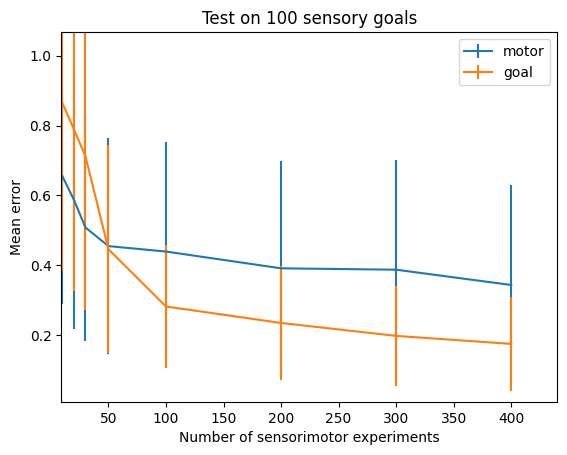

In [6]:
ax = plt.axes()

for log in xps.logs:
    log.plot_learning_curve(ax)
    
plt.legend(('motor', 'goal'))

To iterate on the configurations and logs, for instance to plot a same log for all experiment, you can use the following code:

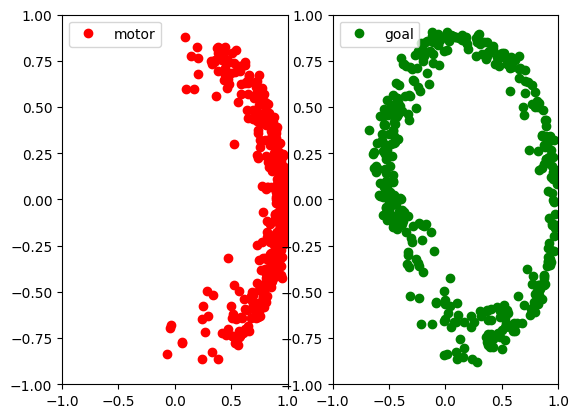

In [7]:
colors = ('r', 'g', 'b')

for i, (config, log) in enumerate(zip(xps.settings, xps.logs)):    
    plot_index = 120 + i + 1
    ax_motor = plt.subplot(plot_index)
    ax_motor.axis([0, 1, -1, 1])
    log.scatter_plot(ax_motor, (('sensori', [0, 1]), ), color=colors[i])
    
    plt.legend([config.babbling_mode])

# Exercise

Comment on the standard deviation of the first plot and think of a way to solve this problem.

simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum
simple_arm
pendulum
npendulum


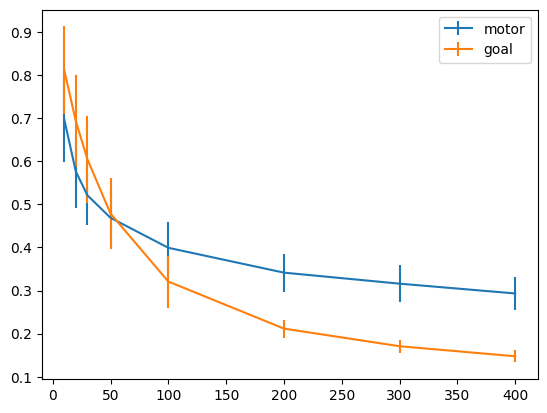

In [14]:
# %load exercise_solutions/running_experiment_pool__pool.py
"""
We will now run each experiment 10 times.
So this will take quite some time!

Then, we show an exemple of how to plot the mean learning curve of each experiment.

"""

xps.run(repeat=10)

for log in xps.logs:
    avg_err = np.mean([np.mean(np.array(l.eval_errors), axis=1) for l in log], axis=0)
    std_err = np.std([np.mean(np.array(l.eval_errors), axis=1) for l in log], axis=0)

    plt.errorbar(log[0].eval_at, avg_err, std_err)
    
plt.legend(('motor', 'goal'))
